In [44]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from keras.preprocessing import image

ModuleNotFoundError: No module named 'google.colab'

In [22]:
# Directory with our training loud pictures
train_loud_dir = os.path.join('C:/Users/hennm/PycharmProjects/ebeat/playground/mh361/Challenge 3/tmp/train/loud')

# Directory with our training silent pictures
train_silent_dir = os.path.join('C:/Users/hennm/PycharmProjects/ebeat/playground/mh361/Challenge 3/tmp/train/silent')

# Directory with our validation loud pictures
valid_loud_dir = os.path.join('C:/Users/hennm/PycharmProjects/ebeat/playground/mh361/Challenge 3/tmp/valid/loud')

# Directory with our validation silent pictures
valid_silent_dir = os.path.join('C:/Users/hennm/PycharmProjects/ebeat/playground/mh361/Challenge 3/tmp/valid/silent')

In [36]:
print('total training loud images:', len(os.listdir(train_loud_dir)))
print('total training silent images:', len(os.listdir(train_silent_dir)))
print('total validation loud images:', len(os.listdir(valid_loud_dir)))
print('total validation silent images:', len(os.listdir(valid_silent_dir)))

total training loud images: 530
total training silent images: 530
total validation loud images: 114
total validation silent images: 108


['plot_1 - Kopie (2).png', 'plot_1 - Kopie (3).png', 'plot_1 - Kopie (4).png', 'plot_1 - Kopie (5).png', 'plot_1 - Kopie (6).png', 'plot_1 - Kopie (7).png', 'plot_1 - Kopie (8).png', 'plot_1 - Kopie (9).png', 'plot_1 - Kopie.png', 'plot_1.png']
['plot_0 - Kopie (2).png', 'plot_0 - Kopie (3).png', 'plot_0 - Kopie (4).png', 'plot_0 - Kopie (5).png', 'plot_0 - Kopie (6).png', 'plot_0 - Kopie (7).png', 'plot_0 - Kopie (8).png', 'plot_0 - Kopie (9).png', 'plot_0 - Kopie.png', 'plot_0.png']
['plot_121 - Kopie (2).png', 'plot_121 - Kopie (3).png', 'plot_121 - Kopie (4).png', 'plot_121 - Kopie (5).png', 'plot_121 - Kopie.png', 'plot_121.png', 'plot_125 - Kopie (2).png', 'plot_125 - Kopie (3).png', 'plot_125 - Kopie (4).png', 'plot_125 - Kopie (5).png']
['plot_10 - Kopie (2).png', 'plot_10 - Kopie (3).png', 'plot_10 - Kopie (4).png', 'plot_10 - Kopie (5).png', 'plot_10 - Kopie.png', 'plot_10.png', 'plot_101 - Kopie (2).png', 'plot_101 - Kopie (3).png', 'plot_101 - Kopie (4).png', 'plot_101 - Ko

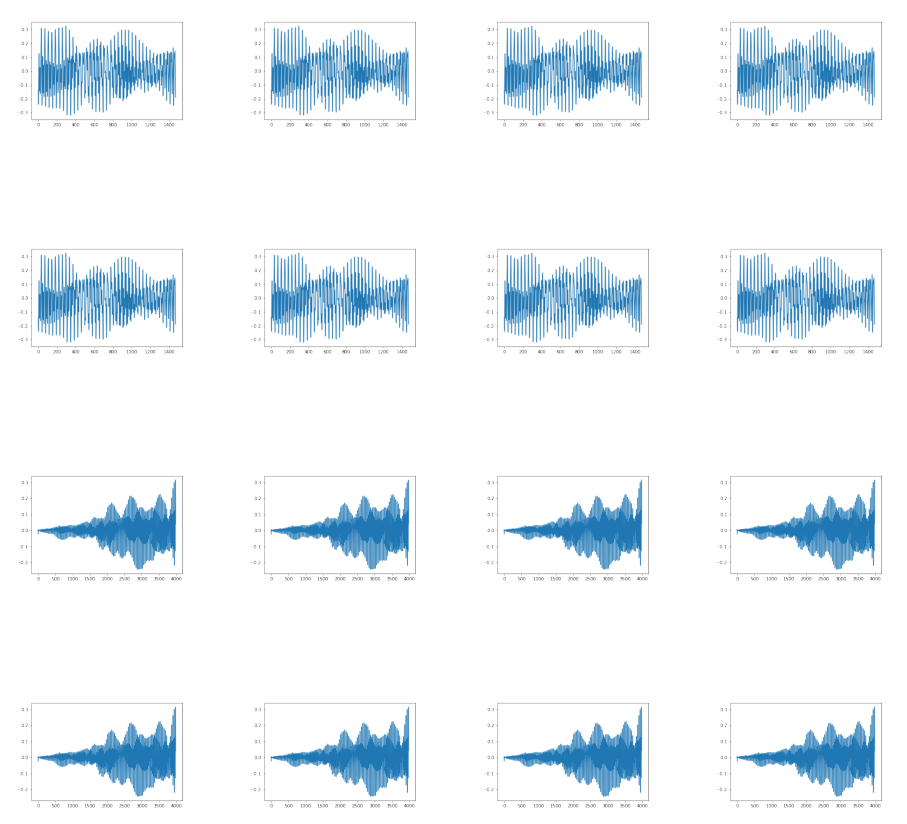

In [37]:
train_loud_names = os.listdir(train_loud_dir)
print(train_loud_names[:10])

train_silent_names = os.listdir(train_silent_dir)
print(train_silent_names[:10])

validation_loud_hames = os.listdir(valid_loud_dir)
print(validation_loud_hames[:10])

validation_silent_names = os.listdir(valid_silent_dir)
print(validation_silent_names[:10])

%matplotlib inline

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_loud_pic = [os.path.join(train_loud_dir, fname)
                for fname in train_loud_names[pic_index-8:pic_index]]
next_silent_pic = [os.path.join(train_silent_dir, fname)
                for fname in train_silent_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_loud_pic + next_silent_pic):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [38]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 120 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'C:/Users/hennm/PycharmProjects/ebeat/playground/mh361/Challenge 3/tmp/train/',  # This is the source directory for training images
        classes = ['loud', 'silent'],
        target_size=(200, 200),  # All images will be resized to 200x200
        batch_size=120,
        # Use binary labels
        class_mode='binary')

# Flow validation images in batches of 19 using valid_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        'C:/Users/hennm/PycharmProjects/ebeat/playground/mh361/Challenge 3/tmp/valid/',  # This is the source directory for training images
        classes = ['loud', 'silent'],
        target_size=(200, 200),  # All images will be resized to 200x200
        batch_size=19,
        # Use binary labels
        class_mode='binary',
        shuffle=False)

Found 1060 images belonging to 2 classes.
Found 222 images belonging to 2 classes.


In [39]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape = (200,200,3)),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)])

model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [40]:
history = model.fit(train_generator,
      steps_per_epoch=8,
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 5s 628ms/step - loss: 60.4394 - accuracy: 0.5160 - val_loss: 31.8514 - val_accuracy: 0.2500
Epoch 2/15
8/8 [==============================] - 2s 285ms/step - loss: 5.0907 - accuracy: 0.4947 - val_loss: 0.6916 - val_accuracy: 0.7500
Epoch 3/15
8/8 [==============================] - 2s 288ms/step - loss: 0.6932 - accuracy: 0.4969 - val_loss: 0.6911 - val_accuracy: 0.7500
Epoch 4/15
8/8 [==============================] - 3s 329ms/step - loss: 0.6931 - accuracy: 0.5053 - val_loss: 0.6908 - val_accuracy: 0.7500
Epoch 5/15
8/8 [==============================] - 2s 299ms/step - loss: 0.6932 - accuracy: 0.4968 - val_loss: 0.6907 - val_accuracy: 0.7500
Epoch 6/15
8/8 [==============================] - 2s 300ms/step - loss: 0.6931 - accuracy: 0.5085 - val_loss: 0.6906 - val_accuracy: 0.7500
Epoch 7/15
8/8 [==============================] - 3s 319ms/step - loss: 0.6930 - accuracy: 0.5128 - val_loss: 0.6905 - val_accuracy: 0.7500
Epoch 8/15
8/8 [==

In [41]:
model.evaluate(validation_generator)

12/12 [==============================] - 1s 53ms/step - loss: 0.6929 - accuracy: 0.5405


[0.6928691267967224, 0.5405405163764954]

12/12 [==============================] - 0s 37ms/step


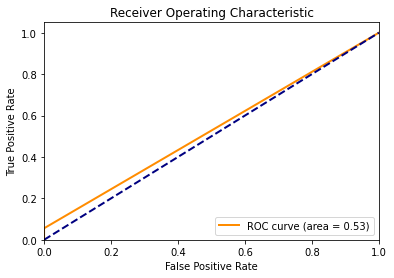

In [43]:
STEP_SIZE_TEST=validation_generator.n//validation_generator.batch_size
validation_generator.reset()
preds = model.predict(validation_generator,
                      verbose=1)

fpr, tpr, _ = roc_curve(validation_generator.classes, preds)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

1/1 [==============================] - 0s 49ms/step
[0.49747398]
test is a loud


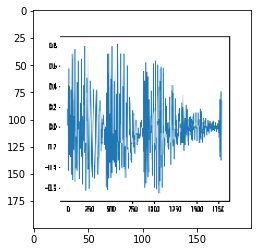

In [66]:
path = 'C:/Users/hennm/PycharmProjects/ebeat/playground/mh361/Challenge 3/tmp/upload/test.png'
img = tf.keras.preprocessing.image.load_img(path, target_size=(200, 200))
x = tf.keras.preprocessing.image.img_to_array(img)
plt.imshow(x / 255.)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=1)
print(classes[0])
if classes[0] < 0.5:
    print(fn + " is a loud")
else:
    print(fn + " is a silent")

['plot', 'train', 'upload', 'valid']